<a href="https://colab.research.google.com/github/sweenseli/Data-Analysis-Projects/blob/main/usa_accident_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('us-crime-dataset')
jovian.set_colab_id('1sywUMrcwDHlAAD7S2dLnM8WkktxLsrpQ')

     |████████████████████████████████| 68 kB 5.4 MB/s 


##US Accidents Exploratory Data Analysis



TO DO -
1. Importing datasets directly from kaggle using the python library 'opendatasets'.
2. Information about accidents in USA from Feb 2016 to Jan 2021.
3. Use the analysis for preventing accidents.



In [3]:
pip install opendatasets  --upgrade --quiet

In [4]:
import opendatasets as od
download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sweenseli
Your Kaggle Key: ··········


100%|██████████| 117M/117M [00:03<00:00, 35.1MB/s]


In [5]:
data_filename = './us-accidents/US_Accidents_Dec20_updated.csv'

##Data Preparation and Cleaning

In [6]:
import pandas as pd


In [7]:
df = pd.read_csv(data_filename)

In [8]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516060,A-4239403,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516061,A-4239404,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516062,A-4239405,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,F

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [10]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [11]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

In [12]:
missing_perc = numeric_df.isna().sum().sort_values(ascending=False) / len(numeric_df)
missing_perc

Number               0.690007
Precipitation(in)    0.336760
Wind_Chill(F)        0.296370
Wind_Speed(mph)      0.084998
Humidity(%)          0.030018
Visibility(mi)       0.029162
Temperature(F)       0.028385
Pressure(in)         0.023926
Severity             0.000000
Start_Lat            0.000000
Start_Lng            0.000000
End_Lat              0.000000
End_Lng              0.000000
Distance(mi)         0.000000
dtype: float64

In [13]:
missing_perc[missing_perc != 0]

Number               0.690007
Precipitation(in)    0.336760
Wind_Chill(F)        0.296370
Wind_Speed(mph)      0.084998
Humidity(%)          0.030018
Visibility(mi)       0.029162
Temperature(F)       0.028385
Pressure(in)         0.023926
dtype: float64

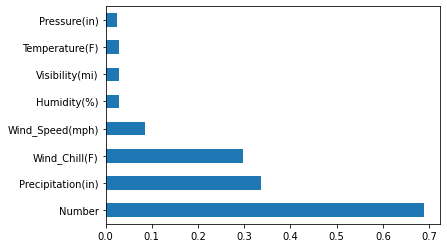

In [14]:
missing_perc[missing_perc != 0].plot(kind='barh')

## Exploratory Data Analysis & Visualization

We'll pick columns:
1. City
2. Start time
3. Start Lang, Start long
4. Temperature
5. Weather Condition

###CITY

AttributeError: ignored

In [15]:
df.City

0               Dublin
1               Dayton
2           Cincinnati
3           Cincinnati
4                Akron
              ...     
1516059      Riverside
1516060      San Diego
1516061         Orange
1516062    Culver City
1516063       Highland
Name: City, Length: 1516064, dtype: object

In [16]:
cities_acc = df.City.unique()
len(cities_acc)

10658

In [17]:
cities_accidents = df.City.value_counts() #cities with maximum accidents
cities_accidents

Los Angeles                     39984
Miami                           36233
Charlotte                       22203
Houston                         20843
Dallas                          19497
                                ...  
Manzanita                           1
West Brooklyn                       1
Garfield Heights                    1
Belding                             1
American Fork-Pleasant Grove        1
Name: City, Length: 10657, dtype: int64

In [18]:
cities_accidents.head(n=100) #100 cities with max accidents sorted in descending order

Los Angeles    39984
Miami          36233
Charlotte      22203
Houston        20843
Dallas         19497
               ...  
Memphis         2221
Ogden           2219
Diamond Bar     2215
Livermore       2200
Fairfield       2188
Name: City, Length: 100, dtype: int64

In [19]:
"NY" in df.State #New york is not in the dataset or else it would have been on top of the list 

False

In [20]:
cities_accidents[:20]

Los Angeles     39984
Miami           36233
Charlotte       22203
Houston         20843
Dallas          19497
Sacramento      18431
Orlando         16169
Portland        14805
San Diego       14090
Minneapolis     12653
Atlanta         11854
Chicago         11507
Saint Paul      10084
Phoenix          9934
Raleigh          9516
San Jose         9362
Richmond         8472
Nashville        8381
Riverside        8201
Jacksonville     7815
Name: City, dtype: int64

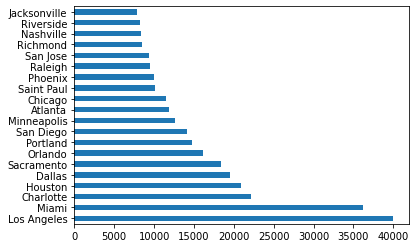

In [21]:
cities_accidents[:20].plot(kind='barh') # 20 cities with maximum accidents have been plotted here

In [22]:
import seaborn as sns
sns.set_style('darkgrid')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


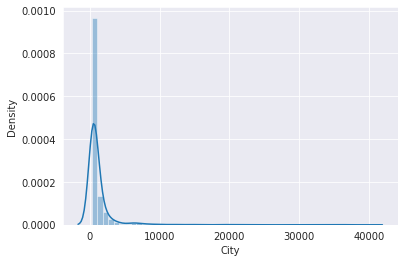

In [23]:
sns.distplot(cities_accidents[:1000])

In [24]:

high_accident_cities = cities_accidents[cities_accidents >= 1000]
low_accident_cities = cities_accidents[cities_accidents < 1000]

In [25]:
high_accident_cities

Los Angeles    39984
Miami          36233
Charlotte      22203
Houston        20843
Dallas         19497
               ...  
Elgin           1007
Chandler        1006
Palo Alto       1006
Sandy           1001
Flushing        1001
Name: City, Length: 251, dtype: int64

In [26]:
low_accident_cities.sort_values(ascending=True).head(n=50)

American Fork-Pleasant Grove    1
Stinnett                        1
Glenwood City                   1
Downing                         1
Heuvelton                       1
Holmen                          1
College Station                 1
Reagan                          1
Farina                          1
Calvert City                    1
Encinal                         1
Tracys Landing                  1
Tupper Lake                     1
Amber                           1
Pall Mall                       1
Weber City                      1
Lone Jack                       1
Braxton                         1
Rich Hill                       1
Varna                           1
Elida                           1
Newton Upper Falls              1
Burnt Prairie                   1
Brook                           1
Hayti                           1
Cat Spring                      1
Niagara University              1
Treynor                         1
Rapid River                     1
McAllen       

In [27]:
len(high_accident_cities)

251

In [28]:
len(high_accident_cities)/len(cities_accidents)  #This tells us the 2% cities have more than 1000 accidents

0.02355259453880079

In [29]:
len(low_accident_cities)

10406

In [30]:
len(cities_accidents)

10657

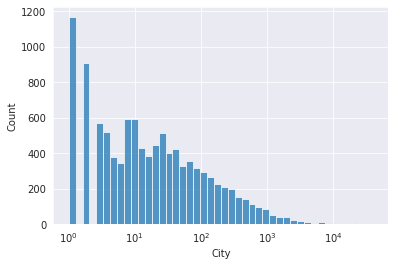

In [31]:
sns.histplot(cities_accidents, log_scale = True)   #major chunk of the data falls between 0-100 accidents

In [32]:
cities_accidents[cities_accidents == 1].count()

1167

In [33]:
cities_accidents[cities_accidents == 0].count()

0

### START TIME

In [34]:
df.Start_Time #this is a string

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:15:39
4          2016-02-08 06:51:45
                  ...         
1516059    2019-08-23 18:03:25
1516060    2019-08-23 19:11:30
1516061    2019-08-23 19:00:21
1516062    2019-08-23 19:00:21
1516063    2019-08-23 18:52:06
Name: Start_Time, Length: 1516064, dtype: object

In [35]:
 pd.to_datetime(df.Start_Time) #now its converted into datetime

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:15:39
4         2016-02-08 06:51:45
                  ...        
1516059   2019-08-23 18:03:25
1516060   2019-08-23 19:11:30
1516061   2019-08-23 19:00:21
1516062   2019-08-23 19:00:21
1516063   2019-08-23 18:52:06
Name: Start_Time, Length: 1516064, dtype: datetime64[ns]

In [36]:
 df.Start_Time = pd.to_datetime(df.Start_Time) #overwriting to store 
 df.Start_Time[0] #we can check here

Timestamp('2016-02-08 00:37:08')

In [37]:
df.Start_Time[0].hour #tells the hour in the datetime (helpful for plotting a graph)

0

In [38]:
df.Start_Time.dt.hour #used to extract hours from the whole series of datetime

0           0
1           5
2           6
3           6
4           6
           ..
1516059    18
1516060    19
1516061    19
1516062    19
1516063    18
Name: Start_Time, Length: 1516064, dtype: int64

#Question 5

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


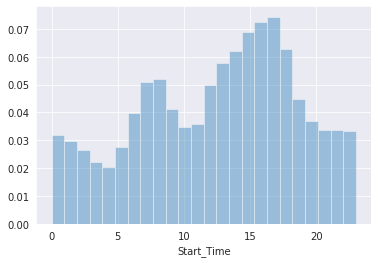

In [39]:
sns.distplot(df.Start_Time.dt.hour, bins = 24, norm_hist=True, kde = False) # 

##THIS TELLS US THAT MAXIMUM ACCIDENTS HAPPEN AT 17th hour i.e 5pm 

- A high percentage of accidents occur during 1500 hrs to 1800 hrs ~ 3pm to 6pm 


#Question 6

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


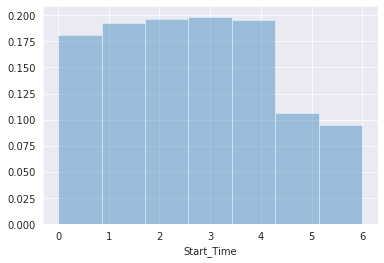

In [40]:
sns.distplot(df.Start_Time.dt.dayofweek, bins = 7, norm_hist=True, kde = False)

- The graph shows that its evenly distributed between all weekdays but a decrease in the number of accidents during weekends.

#Question 9

THIS HELPS US EXTRACT THE WEEKENDS WRT HOURS:-

In [41]:
Sundayy = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
Saturdayy = df.Start_Time[df.Start_Time.dt.dayofweek == 5]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


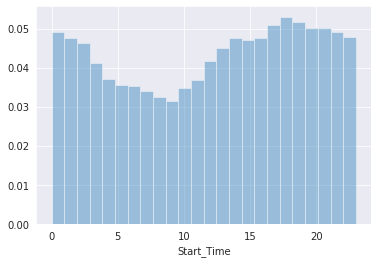

In [42]:
sns.distplot(Sundayy.dt.hour, bins = 24, kde = False, norm_hist = True)

Lets try the same thing with sat 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


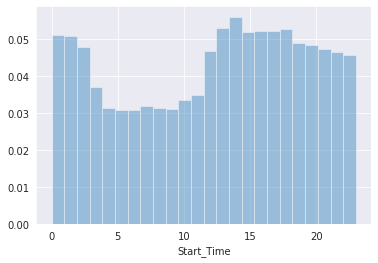

In [43]:
sns.distplot(Saturdayy.dt.hour, bins = 24, kde = False, norm_hist = True)

To see whether accidents by hour is same on weekdays too :-



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


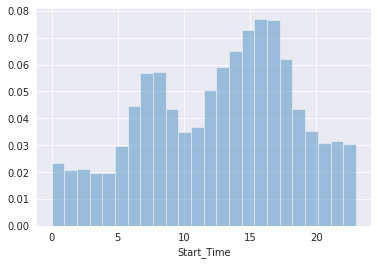

In [44]:
Mondayy = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(Mondayy.dt.hour, bins = 24, kde = False, norm_hist = True)

## Answer 9 - Here we can notice that the peak occurs different, hence the accidents per hour in weekends is not same as the accidents per hour on weekdays


Monday distribution has a deeper insight of people going to work and coming back from it and this is repeated all weekdays.

### Now, let's do the month wrt each day of the week

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


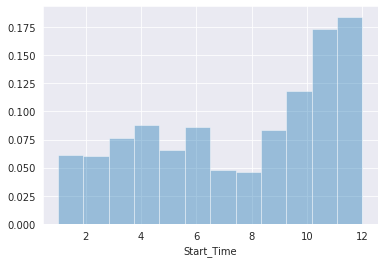

In [45]:
Mondayy = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(Mondayy.dt.month, bins = 12, kde = False, norm_hist = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


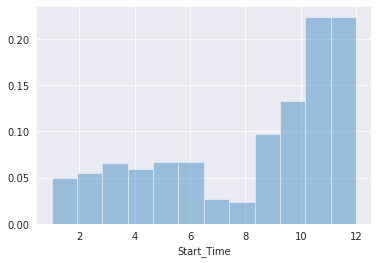

In [46]:
Sundayy = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(Sundayy.dt.month, bins = 12, kde = False, norm_hist = True)

### ACCIDENTS PER MONTH

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


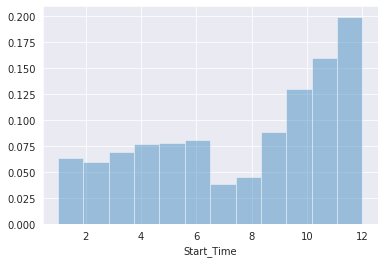

In [47]:
sns.distplot(df.Start_Time.dt.month, bins = 12, norm_hist=True, kde = False)

We see that December has highest number of accidents as compared to other months. It is probably because of the winter season, inexperienced drivers may cause it to happen more.

#Below is something that also impacts the whole analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


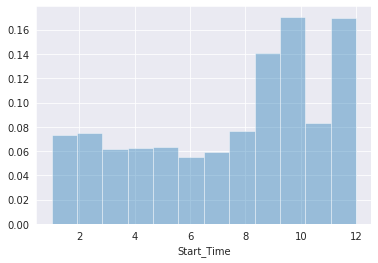

In [48]:
df_2019 = df[df.Start_Time.dt.year == 2019]
sns.distplot(df_2019.Start_Time.dt.month, bins = 12, kde = False, norm_hist = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


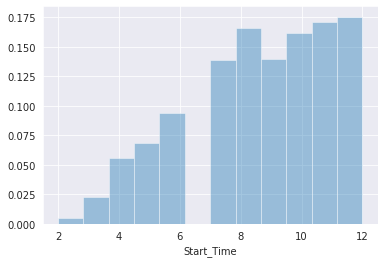

In [49]:
df_2016 = df[df.Start_Time.dt.year == 2016]
sns.distplot(df_2016.Start_Time.dt.month, bins = 12, kde = False, norm_hist = True)

2019 is pretty balanced but when we see the data in 2016 we find that there is some missing data. This means that maybe the data wasn't collected well enough earlier (because the system was still being set up) and in the later years it was of more count.

## START LATITUDE, START LONGITUDE

In [50]:
df.Start_Lat

0          40.10891
1          39.86542
2          39.10266
3          39.10148
4          41.06213
             ...   
1516059    34.00248
1516060    32.76696
1516061    33.77545
1516062    33.99246
1516063    34.13393
Name: Start_Lat, Length: 1516064, dtype: float64

In [51]:
df.Start_Lng

0          -83.09286
1          -84.06280
2          -84.52468
3          -84.52341
4          -81.53784
             ...    
1516059   -117.37936
1516060   -117.14806
1516061   -117.84779
1516062   -118.40302
1516063   -117.23092
Name: Start_Lng, Length: 1516064, dtype: float64

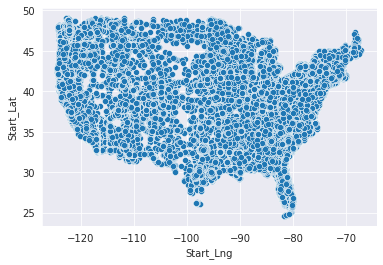

In [52]:
sns.scatterplot(x=df.Start_Lng, y=df.Start_Lat)

### Import the above scatterplot on the map :-



In [53]:
import folium
from folium.plugins import HeatMap

Empty World Map



In [54]:
folium.Map()

Putting markers on world map using :

In [55]:
#THIS IS THE MARKER 
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(40.10891, -83.09286)

In [56]:
map = folium.Map()
marker = folium.Marker((lat, lon))
marker.add_to(map)
map

In [57]:
list(zip(list(df.Start_Lat),list (df.Start_Lng))) #Making pairs of latitudes and longitudes

[(40.10891, -83.09286),
 (39.86542, -84.0628),
 (39.10266, -84.52468),
 (39.10148, -84.52341),
 (41.06213, -81.53784),
 (39.172393, -84.492792),
 (39.06324, -84.03243),
 (39.06708, -84.05855),
 (39.77565, -84.18603),
 (41.37531, -81.82017),
 (40.702247, -84.075887),
 (40.10931, -82.96849),
 (39.19288, -84.47723),
 (39.13877, -84.53394),
 (41.4739, -81.704233),
 (39.582242, -83.677814),
 (40.151785, -81.312635),
 (40.151747, -81.312682),
 (39.97241, -82.84695),
 (39.9838, -82.85657),
 (40.02664, -82.9944),
 (41.679361, -83.573037),
 (40.99613, -85.26613),
 (39.0381, -84.59243),
 (40.03386, -82.99601),
 (39.85798, -84.28181),
 (39.15267, -84.5395),
 (39.30732, -85.95982),
 (39.77572, -84.04815),
 (39.97643, -83.12306),
 (39.58595, -85.82518),
 (39.3638, -85.51659),
 (39.45132, -85.62516),
 (39.75067, -84.14148),
 (39.2675, -81.49929),
 (39.86025, -85.96623),
 (41.95677, -83.67214),
 (38.27401, -85.74844),
 (41.95677, -83.67214),
 (40.52225, -80.06666),
 (40.487814, -80.009439),
 (40.1562

###Lets make a heat map of 0.001 percent of the total data
(As the data is huge)

In [66]:
sample_df = df.sample(int(0.01 * len(df)))
lat_lon_pairs = (list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng))))

In [67]:
map = folium.Map()
folium.plugins.HeatMap(lat_lon_pairs).add_to(map)
map

## Q/A

1. Are there more accidents in warmer areas or colder area? 
2. Which 5 states have more number of accidents? How many per capita?
3. Why does new york not show up in the data? Why is the count lower if its the most populated city?
Ans) Data for new york doesn't exist here.
4. Among the top 100 cities in number of accidents, which states do they belong to most frequntly?
5. What time of the day are accidents most frequent in?
6. Which days of the week have the most accidents?
7. Which months have the most accidents?
8. What is the trend of accidents year over year(decreasing/increasing?)
9. Is the distribution of accidents by hour the same on weekends as on weekdays?
10. When is accidents per unit of traffic the highest?

#Summary and Conclusions

1. Total cities with accidents = 10647

Total cities with high accidents = 251 and Total cities with low accidents = 10406.
2. Number of accidents per city decreases exponentially.
3. No data from New York.
4. 2% of the cities have more than 1000 accidents. 
5. Almost 1200 cities have reported just accident(need to investigate).